## ML4DS Lab - Week 4 - Support Vector Machines (SVM) and K-means

### Aims:
    * Generate your own data to test classifiers
    * Practice Support Vector Machine - tuning soft margin and kernel parameters
    * Practise K-means and Kernel K-means
    

In [7]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
%matplotlib inline
import pylab as plt
from matplotlib.colors import ListedColormap


# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

### Task 1: Generate your own data to test binary classifiers

Generate two dimensional Gaussian distributed data for two different classes

 * Generate multivariate Guassian random samples: 
         https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.multivariate_normal.html
         
 * Plot is based on $$\mbox{class 0}: \mu_0 = \begin{bmatrix} 1 \\ 2 \end{bmatrix}, \Sigma_0=\begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}$$, $$\mbox{class 1}: \mu_1 = \begin{bmatrix} 7 \\ 7 \end{bmatrix}, \Sigma_1=\begin{bmatrix} 2 & 0 \\ 0 & 2 \end{bmatrix}$$ 

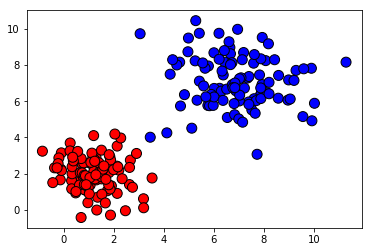

In [17]:
np.random.seed(seed=1)

# Data of class 0
...

# Data of class 1
...

# Combine data and labels into X and t
...

### Task 2: Use SVM on generated data, with different margins and kernerls.

Reference to SVM in sklearn:
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [23]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
...

#### Task 2.1 Test hard margin SVM without kernel projection

##### The SVC function in sklearn implements a SVM with soft margin. It has a parameter `C` controling how soft the margin is. Based on your understanding of soft margin SVM, choose a value for `C` that is equivalent to a hard margin SVM.

Text(0.5, 1.0, 'SVM Classification - Hard Margin')

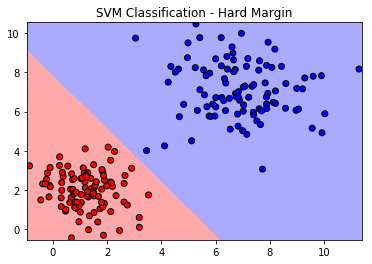

In [25]:
from sklearn.svm import SVC

...

#### Task 2.2 Test soft margin SVM without kernel projection

Text(0.5, 1.0, 'SVM Classification')

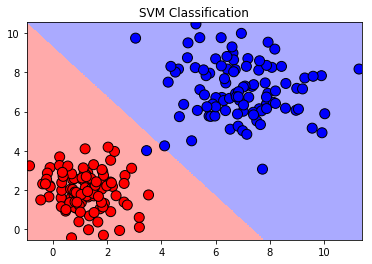

In [26]:
from sklearn.svm import SVC

...

#### Task 2.3: Test non linear data.

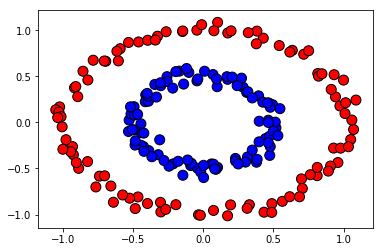

In [29]:
from sklearn import cluster, datasets

n_samples = 200
np.random.seed(seed=1)
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)

X = noisy_circles[0]
t = noisy_circles[1]
plt.scatter(X[:, 0], X[:, 1], c=t, cmap=cmap_bold, edgecolor='k', s=100)


In [30]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
...

#### Train SVM classifier with the RBF kernel:
    * Test difference gamma (1e-3, 1e+3) and margin values C (1e-3, 1e+2)

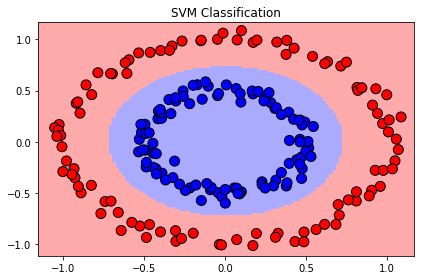

In [33]:
from sklearn.svm import SVC

...

#### Task 2.4: Use cross-validation to determine best  `C` and `gamma` values





### Task 3: Test clustering on 'Moon data'

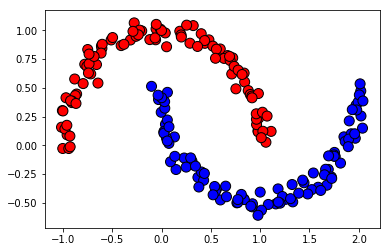

In [34]:
np.random.seed(seed=1)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
X = noisy_moons[0]
t = noisy_moons[1]
plt.scatter(X[:, 0], X[:, 1], c=t, cmap=cmap_bold, edgecolor='k', s=100)

#### Fit `KMeans` on the data and color each data point with its cluster membership  
Reference: 
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

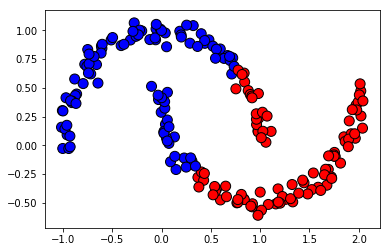

In [36]:
from sklearn.cluster import KMeans
...

#### Task 3.2: Use `SpectralClustering` for Kernel K-Means with RBF and gamma. Test different Gamma values.
    https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html
`gamma` = 15
`affinity` = 'rbf'

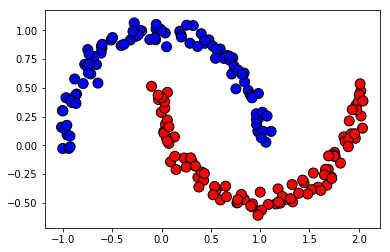

In [38]:
from sklearn.cluster import SpectralClustering

...